#EDA--Nintendo Buiness Insights (VG Sales)
Goals: sales over time, top titles, regional split, and genre performance for Nintendo.

In [13]:
from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
sns.set(style="whitegrid")
%matplotlib inline

GITHUB_RAW = "https://raw.githubusercontent.com/mjg377/Video-Game-Sales-on-a-Global-Scale/main/data/vgsales.csv"
df = pd.read_csv(GITHUB_RAW)

In [17]:
df= pd.read_csv(GITHUB_RAW)

df.columns = [c.strip() for c in df.columns]

sales_cols=["NA_Sales", "EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
for c in sales_cols:
    df[c]=pd.to_numeric(df[c], errors="coerce")

df=df.dropna(subset=["Year"])
df["Year"]=df["Year"].astype(int)
nintendo_df=df[df["Publisher"].str.contains("Nintendo", case=False, na=False)].copy()

#Here we cleaned up the data again, from the raw data, just to include information from the Nintendo publisher, and also removing any NA values for years since we will be looking into time analysis

df.shape, nintendo_df.shape

((16327, 11), (696, 11))

C:\Users\marti\figures


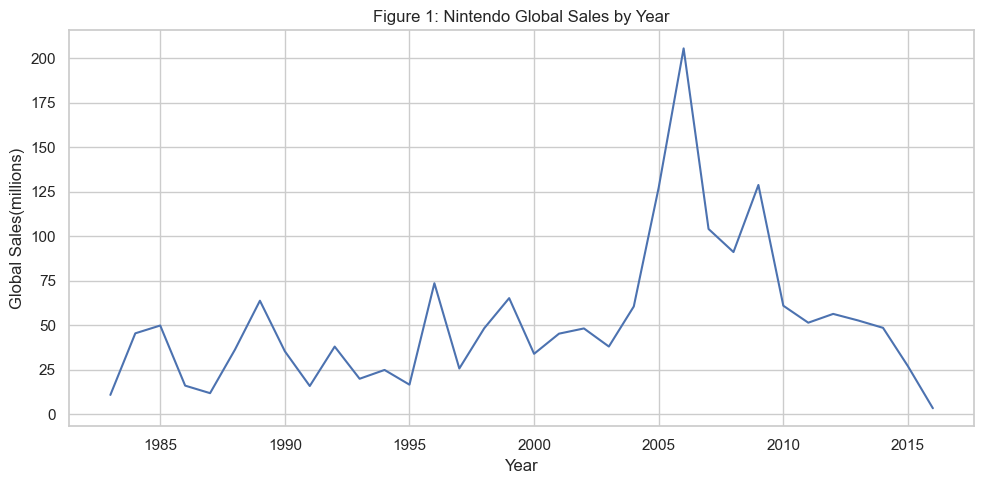

Year
2002     48.31
2003     38.14
2004     60.65
2005    127.47
2006    205.61
2007    104.18
2008     91.22
2009    128.89
2010     61.07
2011     51.53
2012     56.47
2013     52.79
2014     48.65
2015     27.08
2016      3.47
Name: Global_Sales, dtype: float64

In [62]:
#We begin to look into sales over time for nintendo

from pathlib import Path
FIG_DIR = Path("../figures")   # adjust to your structure
FIG_DIR.mkdir(parents=True, exist_ok=True)
print(FIG_DIR.resolve())


yearly_sales= (
    nintendo_df.groupby("Year")["Global_Sales"]
    .sum()
    .sort_index()
)

fig, ax=plt.subplots(figsize=(10,5))
yearly_sales.plot(ax=ax)
ax.set_title("Figure 1: Nintendo Global Sales by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Global Sales(millions)")
plt.tight_layout()
plt.savefig(FIG_DIR/"nintendo_sales_by_year.png", dpi=200)
plt.show()

yearly_sales.tail(15)


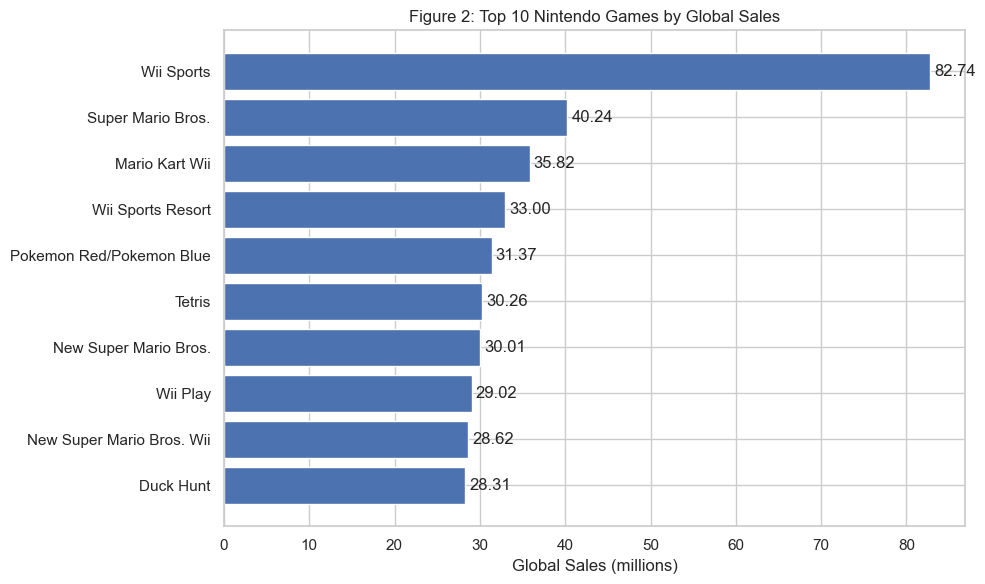

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.82
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.37
5,Tetris,1989,Puzzle,30.26
6,New Super Mario Bros.,2006,Platform,30.01
7,Wii Play,2006,Misc,29.02
8,New Super Mario Bros. Wii,2009,Platform,28.62
9,Duck Hunt,1984,Shooter,28.31


In [64]:
#Now we get to look into the games themselves and see which video games on the Nintendo platform performed well

top10games= (nintendo_df.sort_values("Global_Sales", ascending=False).head(10)[["Name","Year", "Genre","Global_Sales"]])
fig,ax=plt.subplots(figsize=(10,6))
bars=ax.barh(top10games["Name"][::-1], top10games["Global_Sales"][::-1])
ax.set_title("Figure 2: Top 10 Nintendo Games by Global Sales")
ax.set_xlabel("Global Sales (millions)")
ax.bar_label(bars,fmt="%.2f", padding=3)
plt.tight_layout()
plt.savefig(FIG_DIR/ "nintendo_top10games.png",dpi= 150)
plt.show()

top10games.reset_index(drop=True)

#Looking at the graph and chart below, we can see that the best selling game for nintendo of all time is Wii sports
#Also, the genres that showed up more frequently is Plaformers and Sports when compared to other genres


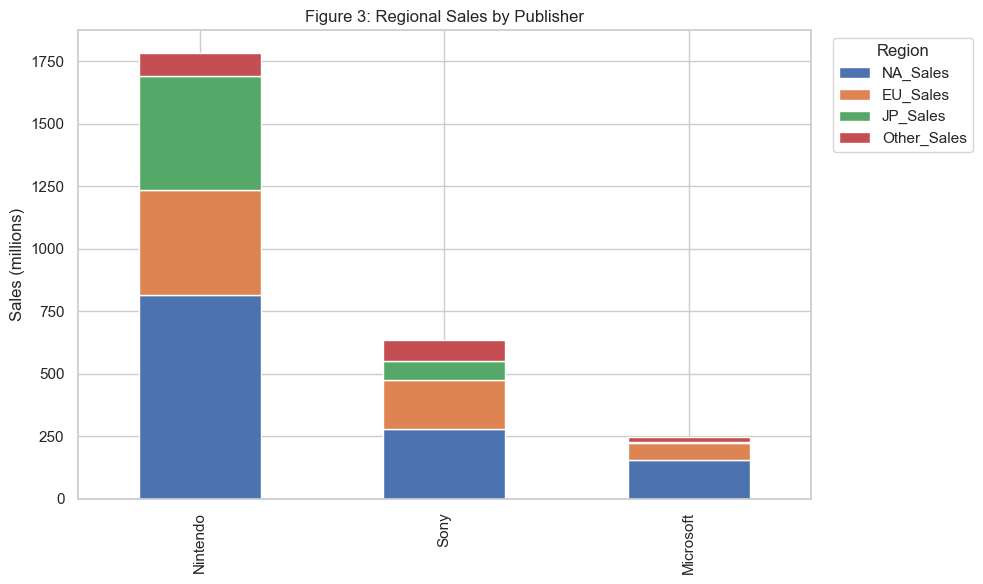

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Nintendo,815.75,418.30,454.99,95.19
Sony,277.18,197.70,76.74,84.35
Microsoft,155.35,68.61,3.26,18.56


In [66]:
#Now that we have the Nintendo specific caterogies sorted, we can now compare them with regional sales versus other platforms

def regional_sales_by_pub(frame, keyword):
    mask = frame ["Publisher"].str.contains(keyword, na=False, case=False)
    return frame.loc[mask, sales_cols].sum()

publishers_interest=["Nintendo","Sony","Microsoft"]
regional =pd.DataFrame ({pub: regional_sales_by_pub (df,pub) for pub in publishers_interest}).T
regional= regional[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]

ax= regional.plot(kind="bar", stacked =True, figsize=(10,6))
ax.set_title("Figure 3: Regional Sales by Publisher")
ax.set_ylabel ("Sales (millions)")
ax.legend(title= "Region", bbox_to_anchor = (1.02,1), loc="upper left")
plt.tight_layout()
plt.savefig(FIG_DIR / "regional_sales_stacked.png", dpi =150)
plt.show()

regional.round(2)

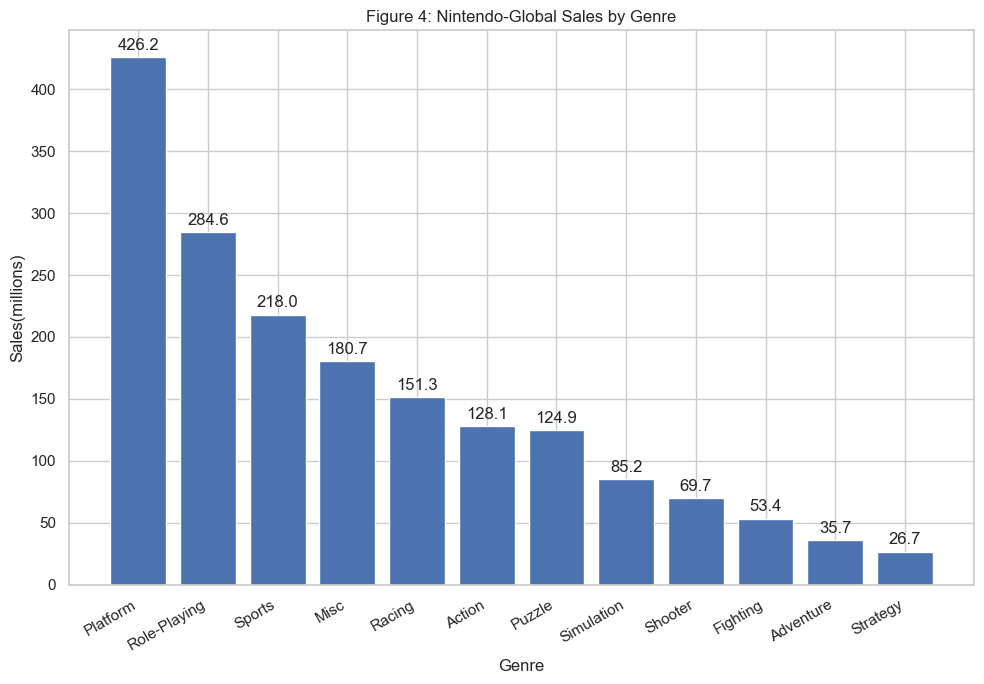

,Global_Sales
Genre,
Platform,426.18
Role-Playing,284.57
Sports,218.01
Misc,180.67
Racing,151.30
Action,128.10
Puzzle,124.88
Simulation,85.25
Shooter,69.69


In [68]:
#Now we look at genre performance 
genre_sales= (nintendo_df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False))

fig,ax= plt.subplots(figsize=(10,7))
bars= ax.bar(genre_sales.index, genre_sales.values)
ax.set_title("Figure 4: Nintendo-Global Sales by Genre")
ax.set_ylabel("Sales(millions)")
ax.set_xlabel("Genre")
ax.bar_label(bars,fmt= "%.1f", padding =3)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig(FIG_DIR /"nintendo_genre_sales.png", dpi=150)
plt.show()

genre_sales.round(2).to_frame("Global_Sales").head(10)

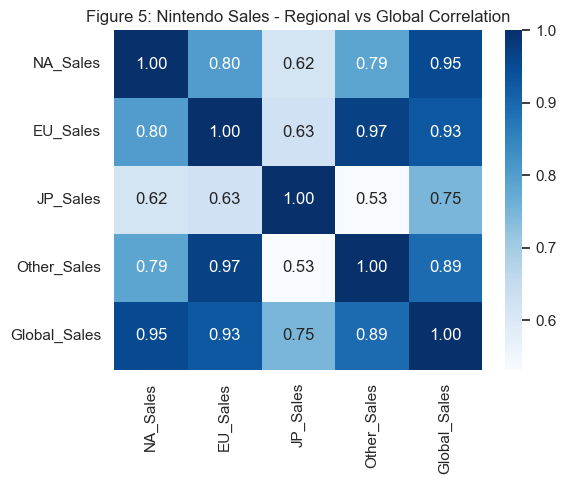

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.803574,0.616281,0.785890,0.953169
EU_Sales,0.803574,1.000000,0.628371,0.969080,0.927307
JP_Sales,0.616281,0.628371,1.000000,0.531856,0.748336
Other_Sales,0.785890,0.969080,0.531856,1.000000,0.892963
Global_Sales,0.953169,0.927307,0.748336,0.892963,1.000000


In [72]:
#We create a Heatmmap showing the regional/global correlations

corr= nintendo_df[sales_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True, fmt=".2f", cmap="Blues")
plt.title ("Figure 5: Nintendo Sales - Regional vs Global Correlation")
plt.tight_layout()
plt.savefig(FIG_DIR/ "nintendo_sales.corr.png",dpi=150)

plt.show()
corr

KEY FINDINGS

Sales Trends:
Nintendo reached its all time peak in global sales in 2006 (205.61 Million units) with its 5 best years occuring consecutively between 2005-2009. This period aligns with the Wii era, showing a clear dominance in platform sales between Nintendo, Microsoft, and Sony.


Top Games: Three of Nintendo's five highest-selling games--Wii Sports(2006), Mario Kart Wii (2008), and Wii Sports Resort(2009)--all lauched during the 2005-2009 peak period.

Genre Insights: For Nintendo, the Platform genre dominates Nintendo's portfolio with 426.2 million gloal sales, which is nearly doible the next best genre (Role-Playing, 284.6 million global sales). Sports, Miscellaneous, and Action follow as top performs which shows that family-friendly and accessible genres are Nintendo's core strengths.

Sales Correlation: Global Sales have a stronger correlation between the North American and European Union markets, despite Japan having slightly better sales than the EU. This suggests that if Nintendo wants to maximize global sales performance, it should focus on the NA and EU markets to have the largest possible payoffs. 
